In [ ]:
# %pip install -r requirements.txt

In [ ]:
# %pip install -Uqq numpy==1.24.4

In [1]:

import sys
def in_venv():
    return sys.prefix != sys.base_prefix
print(in_venv())


from data import *
from models import *
from point_cloud_generator import *
from pointcloudhelpers import *
from utils import *
from helpers import *
from main import *
import pyvista as pv 
import numpy as np

False


2025-03-29 12:23:47.088086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Seed set to 42


Config Loaded Successfully
Generating point cloud from trained model...
./checkpoints/Finer_12480-iter_2025-03-28_12-42-33_model.pt
lon


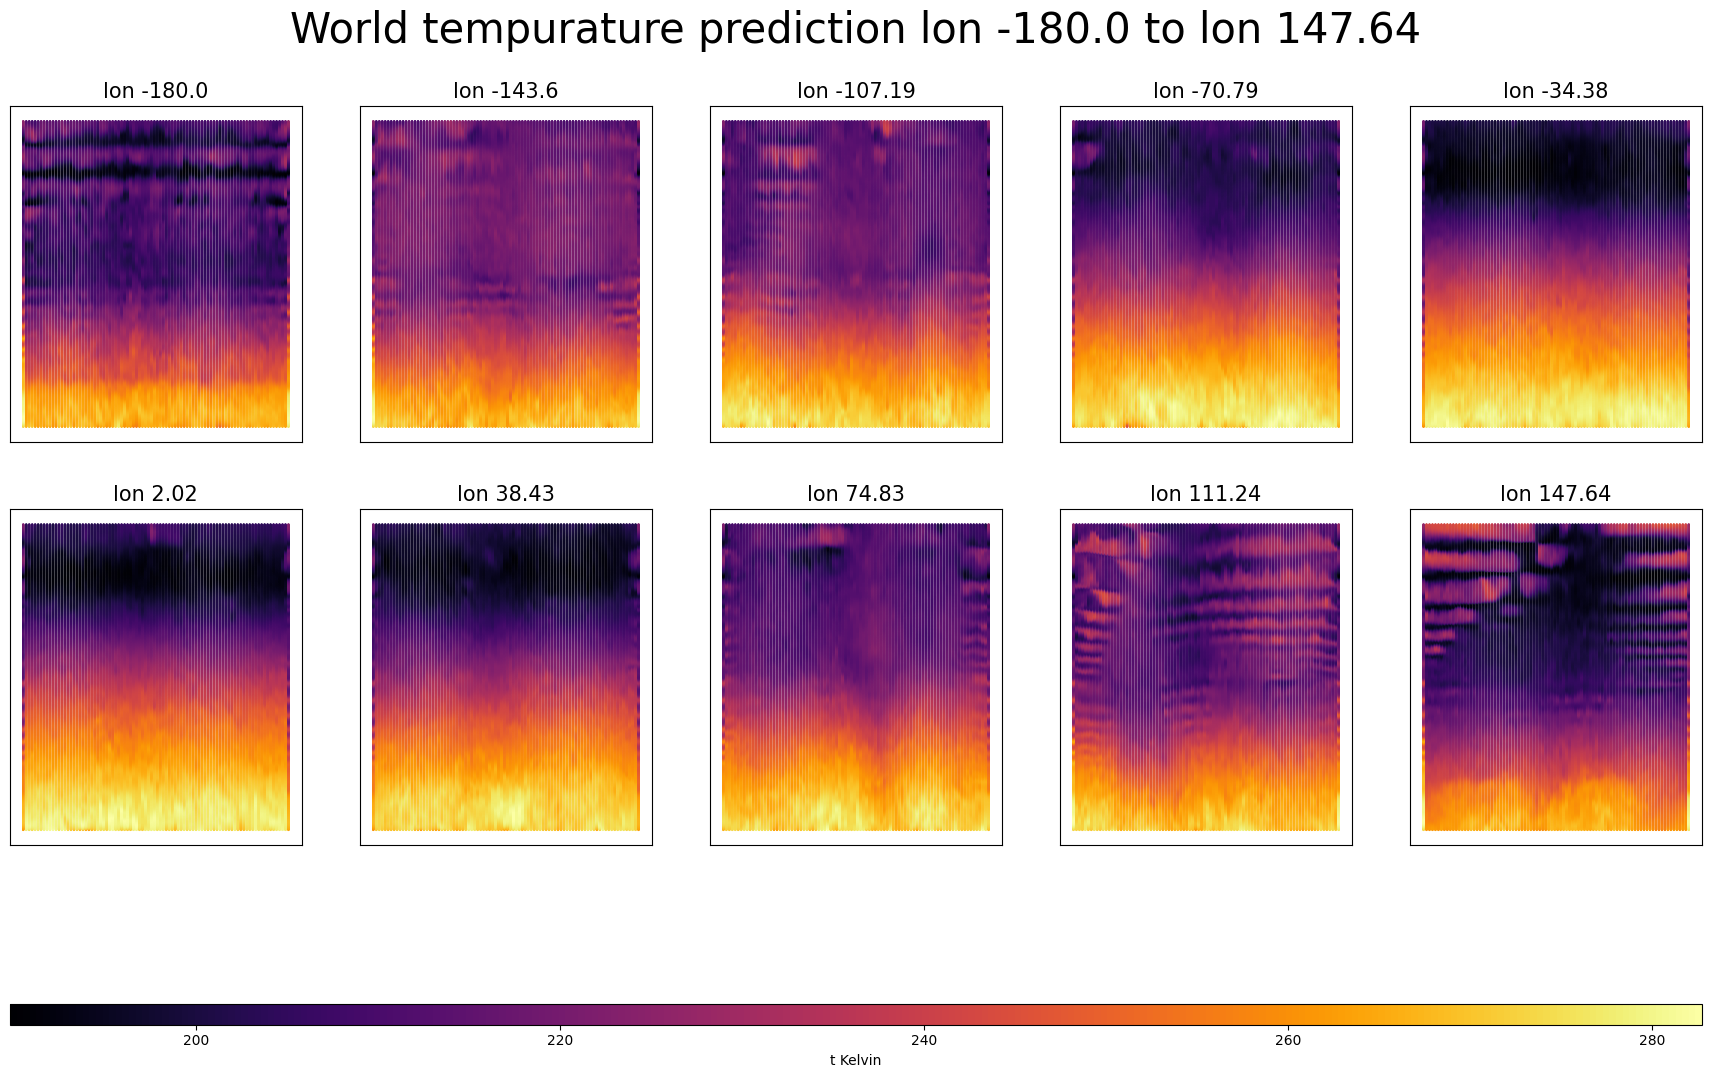

Plot Saved: images/World_FinerModel_lon.png
PolyData (0x1a7ec58a0)
  N Cells:    8100000
  N Points:   8100000
  N Strips:   0
  X Bounds:   -1.800e+02, 1.800e+02
  Y Bounds:   -9.000e+01, 9.000e+01
  Z Bounds:   0.000e+00, 2.000e+04
  N Arrays:   1
Point cloud saved to FinerModel_point_cloud.ply
Point cloud saved to FinerModel_point_cloud.ply
lat


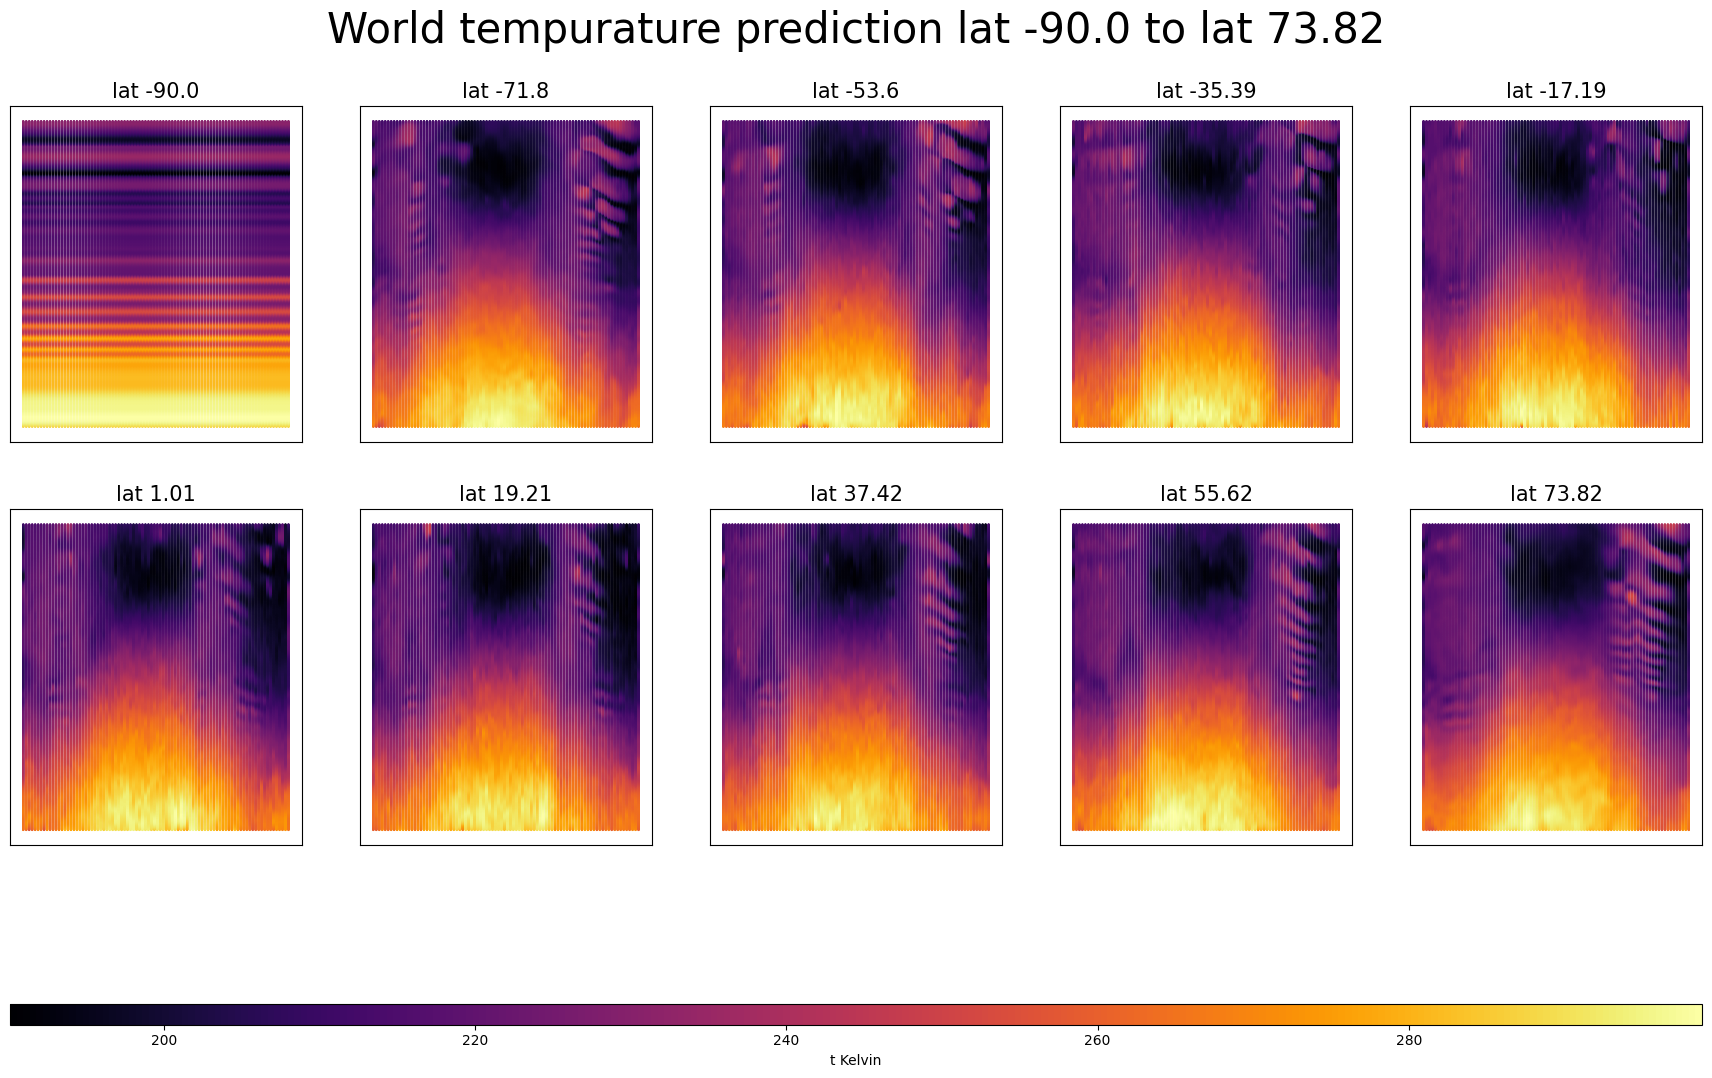

Plot Saved: images/World_FinerModel_lat.png
PolyData (0x1a822bdc0)
  N Cells:    8100000
  N Points:   8100000
  N Strips:   0
  X Bounds:   -1.800e+02, 1.800e+02
  Y Bounds:   -9.000e+01, 9.000e+01
  Z Bounds:   0.000e+00, 2.000e+04
  N Arrays:   1
Point cloud saved to FinerModel_point_cloud.ply
Point cloud saved to FinerModel_point_cloud.ply
all


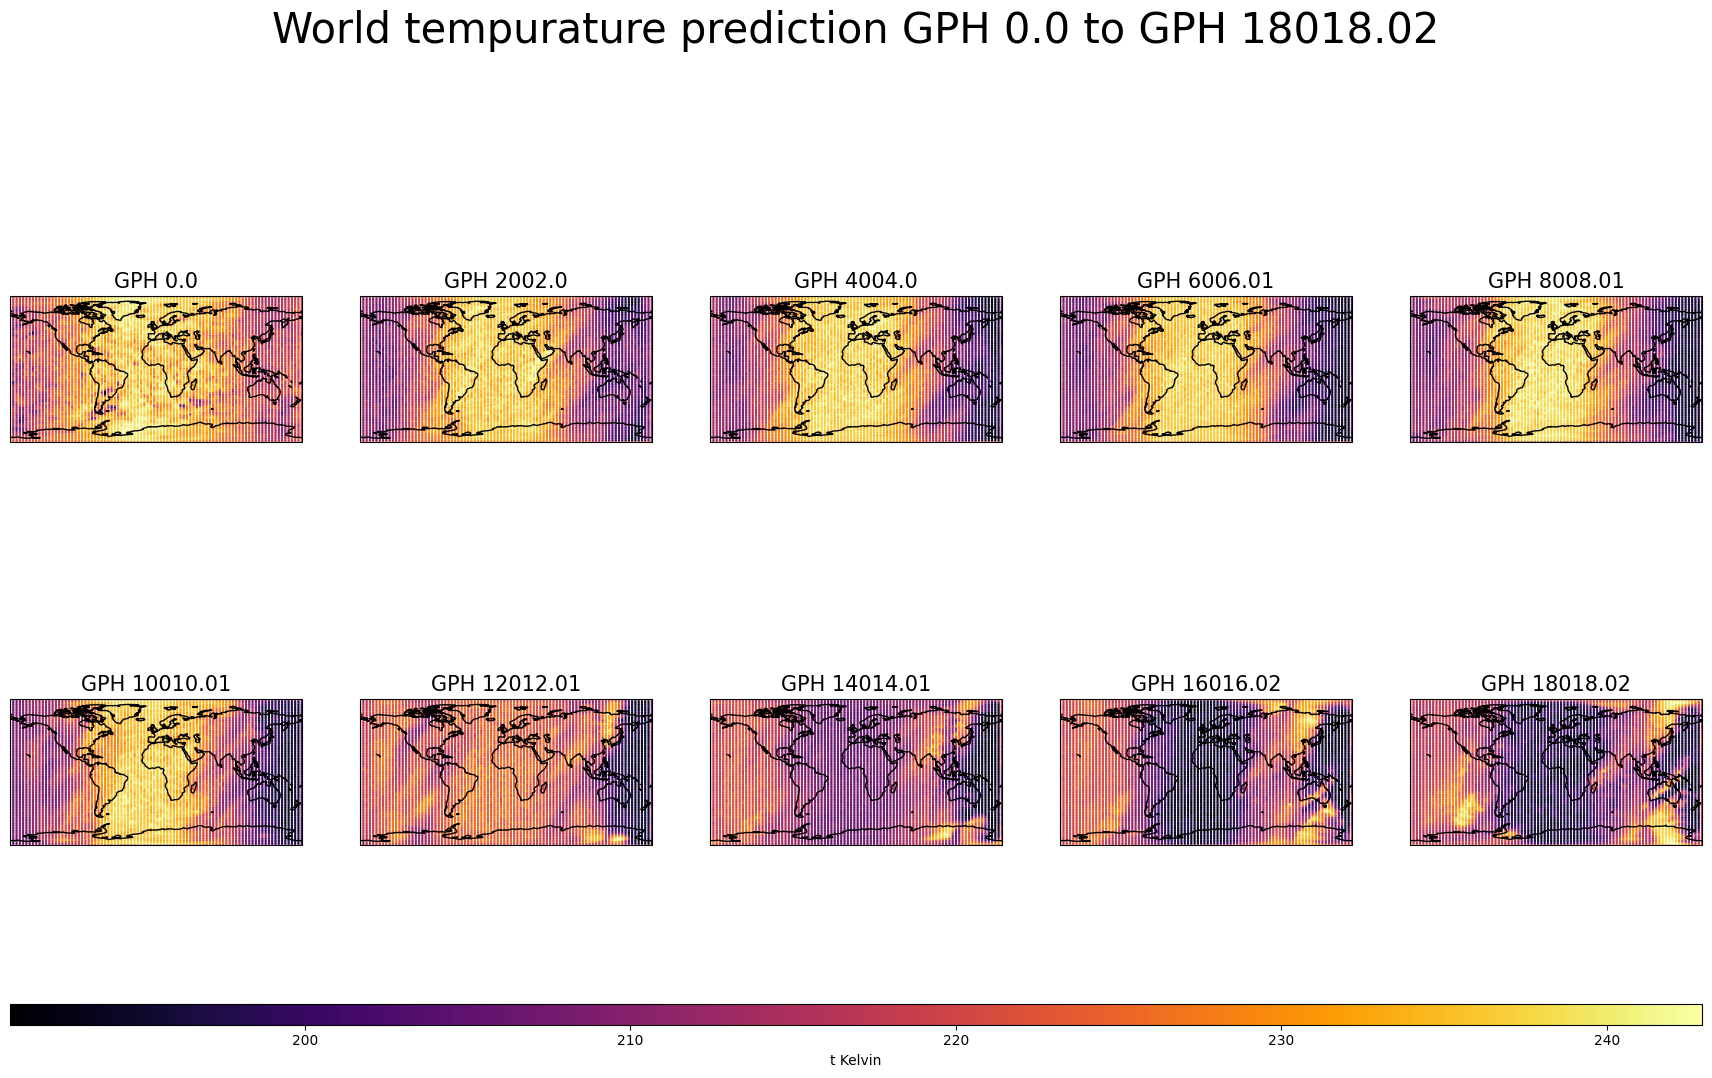

Plot Saved: images/World_FinerModel_GPH.png
PolyData (0x1a8459360)
  N Cells:    8100000
  N Points:   8100000
  N Strips:   0
  X Bounds:   -1.800e+02, 1.800e+02
  Y Bounds:   -9.000e+01, 9.000e+01
  Z Bounds:   0.000e+00, 2.000e+04
  N Arrays:   1
Point cloud saved to FinerModel_point_cloud.ply
Point cloud saved to FinerModel_point_cloud.ply


In [8]:
# Load YAML config
config = load_config("configs/config.yaml")

# # Set random seed for reproducibility
seed_everything(config.seed, workers=True)
print("Config Loaded Successfully")

# # Instantiate DataModule with optimized settings
data_module = AtmosphereDataModule(config)

# # Instantiate Model
target_str = config.model._target_
model = INRModel(config).to(set_device())

print("Generating point cloud from trained model...")

# Load trained model from checkpoint
checkpoint_path = config.model_checkpoint  # Ensure this is defined in config
print(checkpoint_path)
model.load_state_dict(torch.load(checkpoint_path, map_location="cpu"))
model.eval()

# Initialize PointCloudGenerator
config.model._target_ = target_str
pc_generator = PointCloudGenerator(model, config, device="cpu")

for render_type in RENDER_TYPES:
    print(render_type)
    render_type = render_type.lower()
    if render_type not in RENDER_TYPES:
        raise Exception(f"Invalid render type: must be {RENDER_TYPES}, got {render_type}")
    pointcloud_filename = pc_generator.generate(model=target_str.split('.')[-1], render_type=render_type)

    print(f"Point cloud saved to {pointcloud_filename}")